In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data_pepTestCustomers.csv")
df

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48.0,0,0,17546.00,0,1,0,0,0,0,1
1,ID12102,40.0,1,3,30085.10,1,3,1,0,1,1,0
2,ID12103,NaN,0,0,16575.40,1,0,1,1,1,0,0
3,ID12104,23.0,0,3,20375.40,1,3,0,0,1,0,0
4,ID12105,57.0,0,1,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61.0,0,0,47025.00,0,2,1,1,1,1,0
596,ID12697,30.0,0,0,9672.25,1,0,1,1,1,0,0
597,ID12698,31.0,0,3,15976.30,1,0,1,1,0,0,1
598,ID12699,29.0,1,0,14711.80,1,0,0,1,0,1,0


In [3]:
new = pd.read_csv("data_pepNewCustomers.csv")
new.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage
0,ID12701,23,1,0,18766.90,1,0,1,1,0,1
1,ID12702,30,1,1,9915.67,0,1,0,1,0,1
2,ID12703,45,0,1,21881.60,0,0,1,1,1,0
3,ID12704,50,1,3,46794.40,1,2,0,1,0,1
4,ID12705,41,0,0,20721.10,1,0,1,1,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fb8c150>,
      dtype=object)

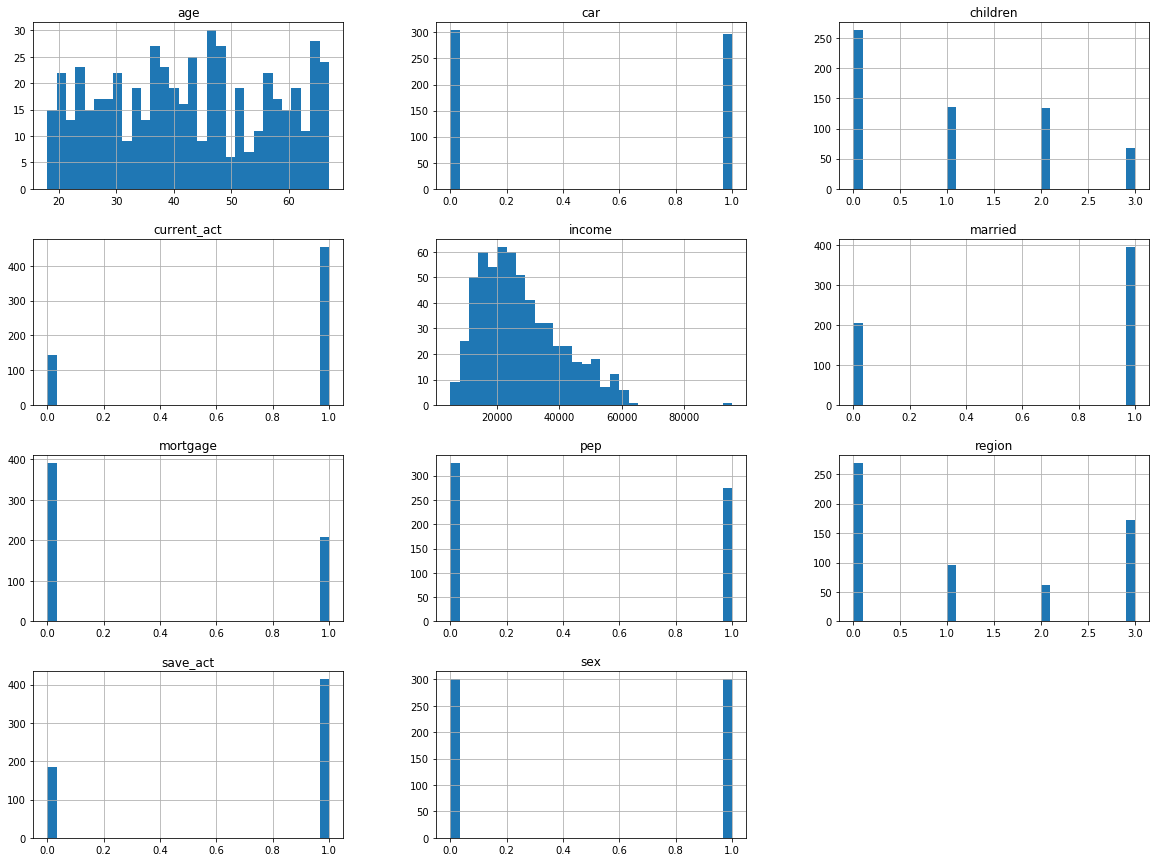

In [5]:
df.hist(bins=30, figsize=(20,15))

In [4]:
corr = df.corr()
corr

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
age,1.000000,-0.127984,0.025891,0.743619,0.017157,0.023944,0.068454,0.171417,-0.035449,-0.030696,0.193604
sex,-0.127984,1.000000,-0.035018,-0.030606,0.021110,-0.014206,0.006667,0.007207,-0.019466,0.066465,0.046843
region,0.025891,-0.035018,1.000000,0.009813,0.006188,0.011520,0.021860,0.084382,-0.013356,0.026083,-0.027279
income,0.743619,-0.030606,0.009813,1.000000,-0.002977,0.042774,0.072590,0.265233,0.035036,-0.019666,0.225086
married,0.017157,0.021110,0.006188,-0.002977,1.000000,-0.048716,-0.009571,0.028604,-0.059996,-0.021711,-0.189578
children,0.023944,-0.014206,0.011520,0.042774,-0.048716,1.000000,0.036455,0.041536,0.006238,-0.074339,-0.057663
car,0.068454,0.006667,0.021860,0.072590,-0.009571,0.036455,1.000000,0.034310,-0.034783,-0.007743,0.018917
save_act,0.171417,0.007207,0.084382,0.265233,0.028604,0.041536,0.034310,1.000000,0.042511,-0.001588,-0.072779
current_act,-0.035449,-0.019466,-0.013356,0.035036,-0.059996,0.006238,-0.034783,0.042511,1.000000,-0.036704,0.025141
mortgage,-0.030696,0.066465,0.026083,-0.019666,-0.021711,-0.074339,-0.007743,-0.001588,-0.036704,1.000000,-0.024182


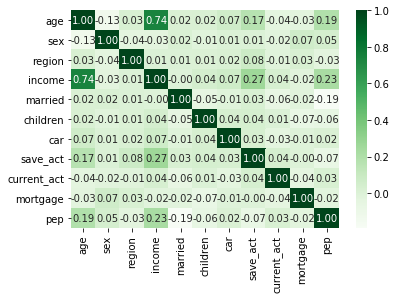

In [20]:
import seaborn as sbn
df_maptplot = sbn.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', cmap = 'Greens')
# 매개변수들 : square=True or False

## 2. 예측률 올리기

In [23]:
mdf = df.copy()
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          540 non-null    float64
 2   sex          600 non-null    int64  
 3   region       600 non-null    int64  
 4   income       600 non-null    float64
 5   married      600 non-null    int64  
 6   children     600 non-null    int64  
 7   car          600 non-null    int64  
 8   save_act     600 non-null    int64  
 9   current_act  600 non-null    int64  
 10  mortgage     600 non-null    int64  
 11  pep          600 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [24]:
# age null 값을 대체하기 위해 평균나이 조사
display(mdf.age.mean())
display(mdf.age.value_counts().head())

42.662962962962965

40.0    19
64.0    18
58.0    17
27.0    17
43.0    17
Name: age, dtype: int64

In [25]:
# age null값 평균나이로 대체
mdf.age.fillna(round(mdf.age.mean(),0), inplace=True)  # round(mdf.age.mean(),0)
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    float64
 2   sex          600 non-null    int64  
 3   region       600 non-null    int64  
 4   income       600 non-null    float64
 5   married      600 non-null    int64  
 6   children     600 non-null    int64  
 7   car          600 non-null    int64  
 8   save_act     600 non-null    int64  
 9   current_act  600 non-null    int64  
 10  mortgage     600 non-null    int64  
 11  pep          600 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [26]:
# 예측률을 올리기 위해 라벨데이터와 관련있는 데이터들을 이용해 파생변수를 생성
mdf['realincome'] = np.where(mdf['children']==0, mdf['income'], mdf['income']/mdf['children'])
mdf.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep,realincome
0,ID12101,48.0,0,0,17546.0,0,1,0,0,0,0,1,17546.000000
1,ID12102,40.0,1,3,30085.1,1,3,1,0,1,1,0,10028.366667
2,ID12103,43.0,0,0,16575.4,1,0,1,1,1,0,0,16575.400000
3,ID12104,23.0,0,3,20375.4,1,3,0,0,1,0,0,6791.800000
4,ID12105,57.0,0,1,50576.3,1,0,0,1,0,0,0,50576.300000


In [27]:
# 클래스 변수인 pep와 각 속성간의 피어슨 상관계수를 내림차순으로 출력해 재구성할게 있는지 확인
corr = mdf.corr()
corr.pep.sort_values(ascending=False)

pep            1.000000
realincome     0.228975
income         0.225086
age            0.183699
sex            0.046843
current_act    0.025141
car            0.018917
mortgage      -0.024182
region        -0.027279
children      -0.057663
save_act      -0.072779
married       -0.189578
Name: pep, dtype: float64

pep
0    326
1    274
Name: pep, dtype: int64


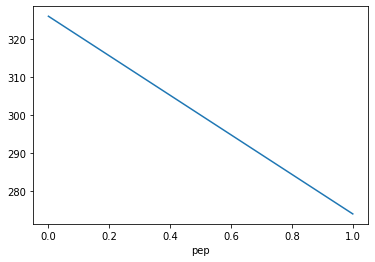

In [31]:
count_data = mdf.groupby('pep')["pep"].count()
print(count_data)
count_data.plot()
plt.savefig("bank-pep-plt.png")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

dfX = mdf.drop(['id','car','pep'], axis=1)
dfy = mdf['pep']

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.24, random_state=0, shuffle=True)

In [34]:
display(X_train.shape, X_test.shape)
X_train.head(6)

(456, 10)

(144, 10)

,age,sex,region,income,married,children,save_act,current_act,mortgage,realincome
520,38.0,0,0,12163.9,1,2,0,1,0,6081.95
598,29.0,1,0,14711.8,1,0,1,0,1,14711.80
89,54.0,0,0,31095.6,1,2,0,1,0,15547.80
382,30.0,1,0,14606.6,1,1,0,1,0,14606.60
408,43.0,0,2,21984.0,1,1,0,0,0,21984.00
157,24.0,1,1,20467.3,1,2,1,1,0,10233.65


In [36]:
# 1. DecisionTree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(X_train, y_train)

display(tree.score(X_train, y_train))
display(tree.score(X_test, y_test))

0.9429824561403509

0.9027777777777778

In [37]:
# 2. SVM
from sklearn.svm import SVC

svm = SVC(random_state=0)
svm.fit(X_train, y_train)

display(svm.score(X_train, y_train))
display(svm.score(X_test, y_test))

0.6644736842105263

0.625

In [38]:
# 3. Neural Network
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

display(mlp.score(X_train, y_train))
display(mlp.score(X_test, y_test))

0.44956140350877194

0.4791666666666667

## 다른 알고리즘으로 예측률 계산하기

In [39]:
# 4. RandomForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier()
r_forest.fit(X_train, y_train)

display(r_forest.score(X_train, y_train))
display(r_forest.score(X_test, y_test))

1.0

0.8888888888888888

In [40]:
# 5. GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

g_boost = GradientBoostingClassifier()
g_boost.fit(X_train, y_train)

display(g_boost.score(X_train, y_train))
display(g_boost.score(X_test, y_test))

0.9495614035087719

0.9097222222222222

In [43]:
# 6. KNeighbors
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

display(clf.score(X_train, y_train))
display(clf.score(X_test, y_test))

1.0

0.6666666666666666

In [45]:
# 7. LinearSVC
from sklearn.svm import LinearSVC

Lsvc = LinearSVC()
Lsvc.fit(X_train, y_train)

display(Lsvc.score(X_train, y_train))
display(Lsvc.score(X_test, y_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5723684210526315

0.5486111111111112